# 数値表現

```{contents} 目次
---
local: true
---
```

$\newcommand{\ket}[1]{|#1\rangle}$

(signed_binary)=
## 符号付き二進数

（計算機中のバイナリ表現に慣れていない人のために）

$-2^{n-1}$から$2^{n}-1$までの整数$X$を$n$ビットレジスタで表現する方法は何通りもありえますが、標準的なのは最高位ビットの0を+、1を-の符号に対応させ、残りの$n-1$ビットで絶対値を表現する方法です。このとき、$X$が正なら通常の（符号なし）整数と同じ表現となり、負なら場合は$n-1$ビット部分が$2^{n-1} - |X|$になるようにとります。つまり、$100 \dots 0$は$-2^{n-1}$、$111 \dots 1$は$-1$に対応します。これは、別の言い方をすれば「$[-2^{n-1}, -1]$の負の数$X$に、$X + 2^n$という符号なし整数を対応させる」とも見て取れます。

正の数同士の足し算などの結果、符号付き$n$ビットレジスタに$2^{n-1}$以上の値が入ってしまうと、最高位ビットが1となり符号が反転して急に小さい数が現れてしまうことがあります。例えば、形式上$2^{n-1} - 1 = (011 \dots 1)_2$に1を足すと、$(100 \dots 0)_2 = -2^{n-1}$です。このような現象をオーバーフローと呼びます。

(nonintegral_fourier)=
## 負・非整数のフーリエ変換

{doc}`extreme_simd`では、$n$ビットレジスタでの逆フーリエ変換$1/\sqrt{2^n} \sum_{k} \exp (2 \pi i j k / 2^n) \ket{k} \rightarrow \ket{j}$を扱いました。ここでは$k$も$j$も$0$以上$2^{n-1}-1$以下の整数に限定していました。それでは、$j$が負であったり非整数であったりする場合の逆フーリエ変換はどのようになるでしょうか。

まず、$j$が負の場合、正の整数$a$で必ず

$$
\exp (2 \pi i j k / 2^n) = \exp [2 \pi i (j + 2^n a) k / 2^n]
$$

が成り立つので、$0 \leq j + 2^n a < 2^n$となる$a$を選べば、逆フーリエ変換は

$$
1/\sqrt{2^n} \sum_{k} \exp (2 \pi i j k / 2^n) \ket{k} \rightarrow \ket{j + 2^n a}
$$

です。特に$2^{n-1} \leq j < 0$の場合、右辺は$\ket{j + 2^n}$であり、上の符号付き二進数の標準的な表現法に合致することがわかります。

次に$j$が非整数の場合ですが、このときは逆フーリエ変換の結果が一つの計算基底で表現されず、計算基底の重ね合わせ$\sum_{l} f_{jl} \ket{l}$となります。ここで$f_{jl}$は$j$に最も近い$l$において$|f_{jl}|^2$が最も大きくなるような分布関数です。次のセルで$j$の値を変えて色々プロットして、感覚を掴んでみてください。

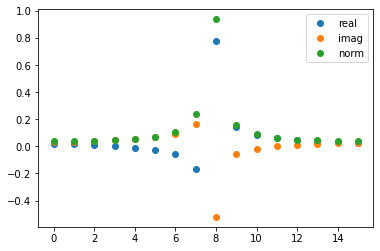

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n = 4
j = 7.8

N = 2 ** n

# Array jk = j*[0, 1, ..., N-1]
jk = np.arange(N) * j
phase_jk = np.exp(2. * np.pi * 1.j * jk / N)

# Array kl = [[0, 0, ..., 0], [0, 1, ..., N-1], ..., [0, N-1, ..., (N-1)(N-1)]]
kl = np.outer(np.arange(N), np.arange(N))
phase_minuskl = np.exp(-2. * np.pi * 1.j * kl / N)

# Inverse Fourier transform
f_jl = (phase_jk @ phase_minuskl) / N

# Plot Re(f_jl), Im(f_jl), and |f_jl|
plt.plot(np.arange(N), np.real(f_jl), 'o', label='real')
plt.plot(np.arange(N), np.imag(f_jl), 'o', label='imag')
plt.plot(np.arange(N), np.abs(f_jl), 'o', label='norm')
plt.legend()